In [110]:
import sympy
from sympy import Symbol, symbols, S, Function, integrate, Integral, diff, solve, latex, simplify, Eq, Piecewise, plot
from IPython.display import display, Latex

## Занятие 9-10
## Математический анализ
## Интегрирование функции: первообразная и неопределенный интеграл
https://docs.sympy.org/1.5.1/modules/integrals/integrals.html

https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D0%B2%D0%BE%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BD%D0%B0%D1%8F

https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B8%D0%BD%D1%82%D0%B5%D0%B3%D1%80%D0%B0%D0%BB%D0%BE%D0%B2_%D1%8D%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%80%D0%BD%D1%8B%D1%85_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B9

### Задача 1.
Вычислить определенные интегралы:
$$
1)\ \int_2^3 \frac{1}{\sqrt{x-2}},\ 2) \int_1^6 \frac{1}{(x-1)^3},\ 3)\ \int_2^\infty \frac{1}{(x-1)^3}
$$

In [ ]:
x, C = symbols('x C')

# Функия для нахождения определённого интеграла
def Find_Def_Integral(func, left_lim, right_lim, sym = x):
  return integrate(func, (sym, left_lim, right_lim))

func_1 = S(1)/sympy.sqrt(x - 2)
func_2 = S(1)/(x - 1)**3

display(Latex(fr"{latex(Integral(func_1, (x, 2, 3)))} = {latex(Find_Def_Integral(func_1, 2, 3))}"))
display(Latex(fr"{latex(Integral(func_2, (x, 1, 6)))} = {latex(Find_Def_Integral(func_2, 1, 6))}"))
display(Latex(fr"{latex(Integral(func_2, (x, 1, sympy.oo)))} = {latex(Find_Def_Integral(func_2, 1, sympy.oo))}"))

### Задача 2
Описать функцию, находящую неопределенный интеграл $\int f(x)\,dx$ в виде $F(x)+C$.

Использовать эту функцию для интегрирования $\sin(3x+5)$, $x{\rm tg}(x^2)$, $(e^{\sin x})\cos x$, $x^2e^{x^3}$

In [ ]:
# Фунция для нахождения неопределённого интеграла
def Find_Indef_Integral(func, sym = x):
  return integrate(func, sym) + C

lst_funcs = [sympy.sin(3 * x + 5), x * sympy.tan(x**2), (sympy.E ** sympy.sin(x)) * sympy.cos(x), x**2 * sympy.E**(x**3)]
for i in range(len(lst_funcs)):
  display(Latex(fr"{latex(Integral(lst_funcs[i], x))} = {latex(Find_Indef_Integral(lst_funcs[i], x))} \quad , \  " + r"C \in \mathbb{R}"))
  print()

### Задача 3.
Найти первообразную функции $\frac{x-3}{(x+1)^2}$, график которой проходит через начало координат.

In [ ]:
func = (x - 3)/(x + 1)**2
display(Find_Indef_Integral(func, x).subs({ C : solve(Eq(Find_Indef_Integral(func, x).subs({x : 0}), 0), C)[0]}))

### Задача 4.
Описать функцию, вычисляющую неопределенный интеграл от $\frac{1}{\sqrt{x^2+a}}$ по формуле "длинного логарифма":
$$
\int\frac{1}{\sqrt{x^2+a}} = \ln|x + \sqrt{x^2 + a}| + C,\quad a \neq 0.
$$
Функция возвращает $\ln|x| + C$ при $a = 0$. Аргументы функции - переменная интегрирования $x$ и параметр $a$.

Вызвать функцию при $a = 0, 1, 4$. Сравнить с результатом integrate.

Проверить дифференцированием, при необходимости использовать simplyfy для того, чтобы упростить выражение.

Рекомендется создавать положительные символы, чтобы не было неоднозначности.

In [ ]:
x_pos, a = symbols('x a', positive = True)

# Функия вычисляющая неопределённый интеграл по формуле "длинного логарифма"
def Find_Indef_Int_Log(a, x_sym = x_pos):
  if (a == 0):
    return sympy.log(abs(x_sym)) + C
  return sympy.log(abs(x_sym + sympy.sqrt(x_sym ** 2 + a))) + C

func_param_a = S(1)/sympy.sqrt(x_pos**2 + a)

lst_params_a = [0, 1, 4]
for i in range(len(lst_params_a)):
  indef_int_cur = Find_Indef_Int_Log(lst_params_a[i])
  display(Latex(fr"[{latex(i + 1)}]. A = {latex(lst_params_a[i])}"))
  display(Latex(fr"\text{{Значение неопределённого интеграла через описанную функцию :}}"))
  display(Latex(fr"{latex(Integral(func_param_a.subs({a : lst_params_a[i]})))} = {latex(indef_int_cur)}"))
  print()
  display(Latex(fr"\text{{Значение неопределённого интеграла через integrate:}}"))
  display(Latex(fr"{latex(Integral(func_param_a.subs({a : lst_params_a[i]})))} = {latex(Find_Indef_Integral(func_param_a.subs({a : lst_params_a[i]}), x_pos))}"))
  print()
  display(Latex(fr"\text{{Проверка дифференцированием: }}"))
  display(Latex(fr"({latex(indef_int_cur)})' = {latex(simplify(diff(indef_int_cur - C, x_pos)))}"))
  print()


### Задача 5.
Провести замену переменной $y = x^2$ в интеграле $\int x e^{x^2}\,dx$.

In [ ]:
y = Symbol('y')

func_3 = x * sympy.E**(x**2)
display(Latex(fr"\text{{Замена перемнной  }} y = x^2 : "))
I = Integral(func_3, x)
display(Latex(fr"{latex(I)} = {latex(I.transform(x**2, y))} "))

### Задача 6.
$$
sign(x)=\left\{\begin{matrix}
-1,\quad x<0\\
0,\quad x=0\\
1,\quad x>0
\end{matrix}\right.
$$
Описать кусочную функцию $sign(x)$ и функцию $F(x)=\int_{-1}^x sign(t)\,dt$, аргумент обеих функций $x$. Построить график $sign(x)$ красной сплошной линией и $F(x)$ зеленой в одной плоскости на интервале $[-1, 2]$.

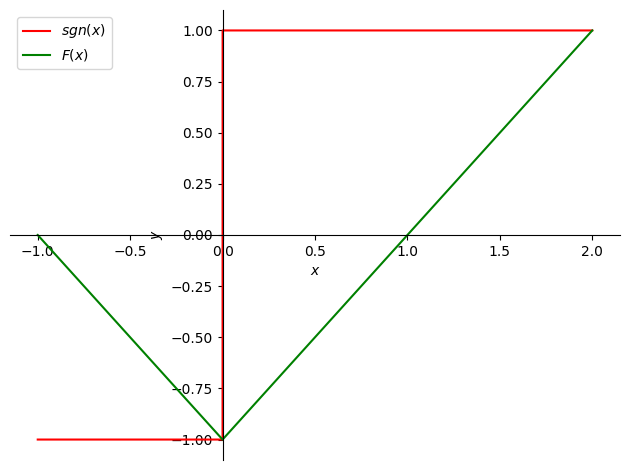

In [198]:
t, x = symbols('t x')

func_sgn = Piecewise((-1, x < 0), (1 , x > 0), (0, True))
int_func_sgn = integrate(func_sgn.subs({x : t}), (t, -1, x))

plt_1 = plot(func_sgn, (x, -1, 2), line_color = "red", legend = True, label = r"$sgn(x)$", xlabel = r"$x$", ylabel = r"$y$", show = False)
plt_1.append(plot(int_func_sgn, (x, -1, 2), line_color = "green",  legend = True, label = r"$F(x)$", xlabel = r"$x$", ylabel = r"$y$", show = False)[0])
plt_1.show()

### Задача 7.
В неопределенном интеграле $\int \frac1{2\sqrt x}e^{\sqrt x},\,dx$ провести замену переменной $x=u^2$, вычислить полученный интеграл, сделать обратную замену и проверить правильность полученного результата дифференцированием.
#### Указание.
Нужно использовать положительный символ $u$.

In [ ]:
u = Symbol('u', positive = True)

func_7 = S(sympy.E**(sympy.sqrt(x)))/(2 * sympy.sqrt(x))
I_7 = Integral(func_7, x)
I_trans = I_7.transform(sympy.sqrt(x), u)
Int_def = I_trans.doit()
Int_zamen = Int_def.subs({u : sympy.sqrt(x)})

display(Latex(fr"\text{{Замена перемнной  }} u^2 = x : "))
display(Latex(fr"{latex(I_7)} = {latex(I_trans)}"))
print()
display(Latex(fr"\text{{Вычисление интеграла и обратная замена: }}"))
display(Latex(fr"{latex(I_trans)} = {latex(Int_def + C)} = {latex(Int_zamen + C)}"))
print()
display(Latex(fr"\text{{Проверка дифференцированием: }}"))
display(Latex(fr"({latex(Int_zamen + C)})' = {latex(diff(Int_zamen, x))}"))

### Индивидуальное задание
Провести замену переменных в определенном интеграле, представить результат в виде двух уравнений, как в примере:
\begin{align*}
\int_1^4 \frac{dx}{\sqrt{x}\left(\sqrt{x}+1\right)} = \int_1^2 \frac{2\,dy}{y + 1}\\
\int_1^2 \frac{2\,dy}{y + 1} = 2(\ln 3 - \ln 2)
\end{align*}
(с точностью до перестановки слагаемых и сомножителей)

Вариант №134

$$\int\limits_{2}^{3} e^{\sin{\left(x \right)}} \cos{\left(x \right)}\, dx$$
замена $y = \sin{\left(x \right)}$

In [ ]:
y = Symbol('y')

func_ind = sympy.E**(sympy.sin(x)) * sympy.cos(x)
I_ind = Integral(func_ind, (x, 2, 3))
I_ind_transf = I_ind.transform(sympy.sin(x), y)
I_ind_val = integrate(simplify(I_ind_transf.function), I_ind_transf.limits)
display(Latex(fr"{latex(I_ind)} = {latex(I_ind_transf)}"))
display(Latex(fr"{latex(I_ind_transf)} = {latex(I_ind_val)}"))